In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
SEED = 42
TARGET = 'num_sold'

In [3]:
df = pd.read_csv('../data/raw/train.zip', index_col=0, parse_dates=['date'])
df['product'] = df['product'].str.replace('Using LLMs to ', '')
print(df.shape)
df.head()

(136950, 5)


date    country         store                           product  \
id                                                                         
0  2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1  2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2  2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3  2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4  2017-01-01  Argentina  Kaggle Learn                      Write Better   

    num_sold  
id            
0         63  
1         66  
2          9  
3         59  
4         49

In [4]:
# нет пропусков в данных
df.isna().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [5]:
# данные за 5 лет
df['date'].min(), df['date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

## Сводные продажи

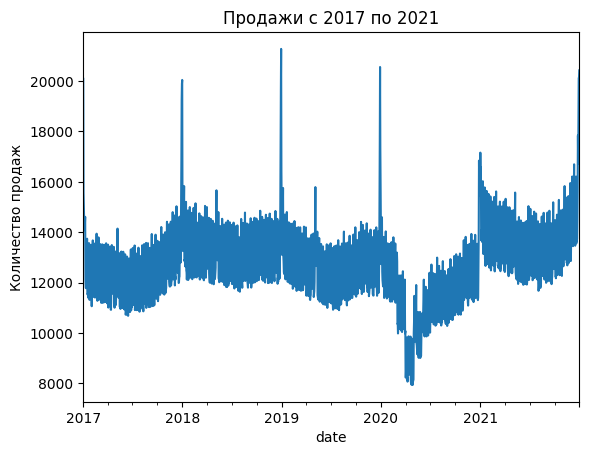

In [6]:
plt.title("Продажи с 2017 по 2021")
df.groupby('date')[TARGET].sum().plot();
plt.ylabel("Количество продаж");

## Продажи по разрезам

In [7]:
def agg_plot(data, by_column):
    fig, axes = plt.subplots(1,2, figsize=(14,6))
    data_agg = data.groupby(['date',by_column], as_index=False)[TARGET].sum()
    sns.lineplot(data=data_agg, x='date',y=TARGET,hue=by_column, alpha=0.5, ax=axes[0])

    ax = sns.boxplot(data=data_agg, x=by_column,y=TARGET,hue=by_column, ax=axes[1])
    plt.xticks(rotation=45)
    fig.suptitle(f'Продажи в разрезе: {by_column}')
    

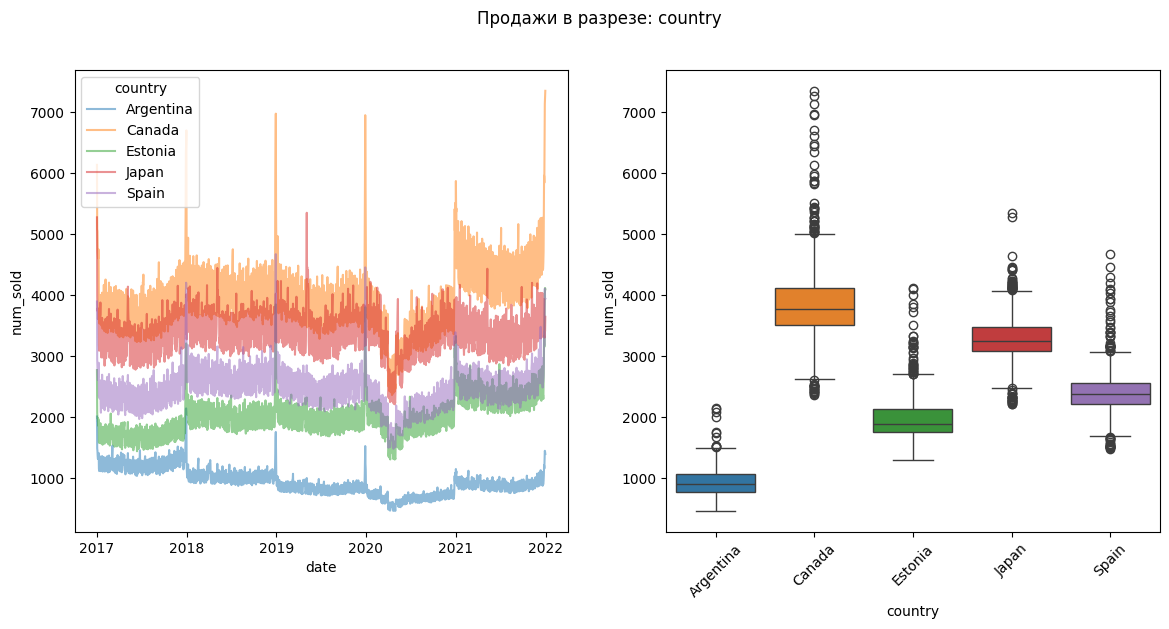

In [8]:
agg_plot(df, 'country')

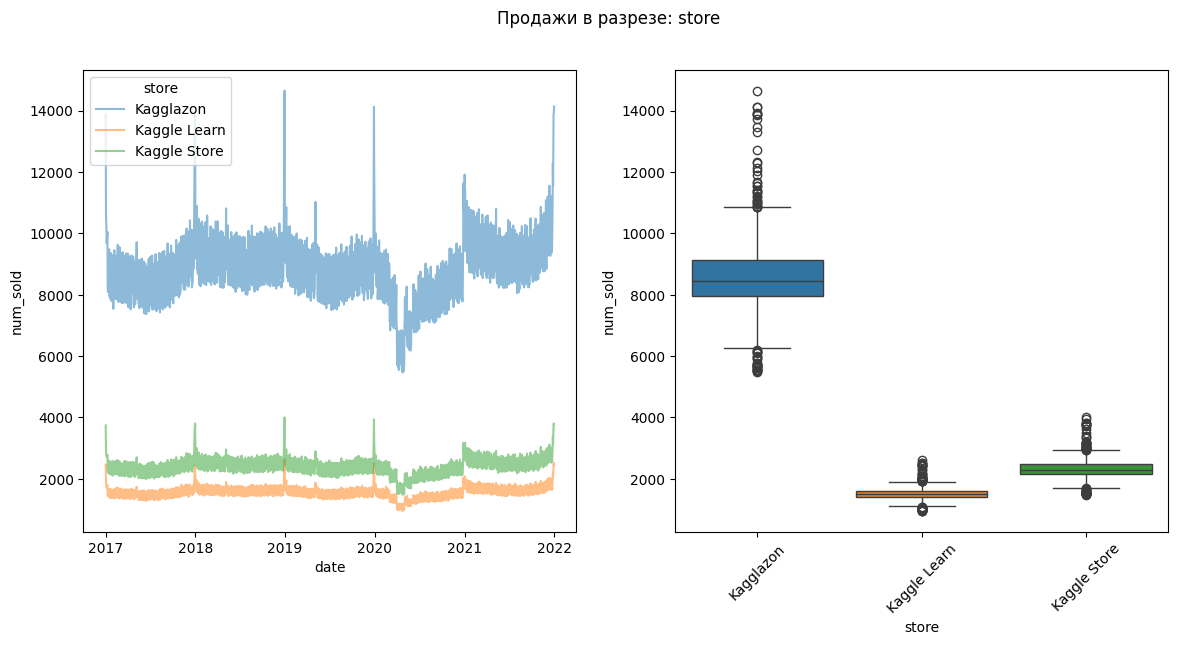

In [9]:
agg_plot(df, 'store')

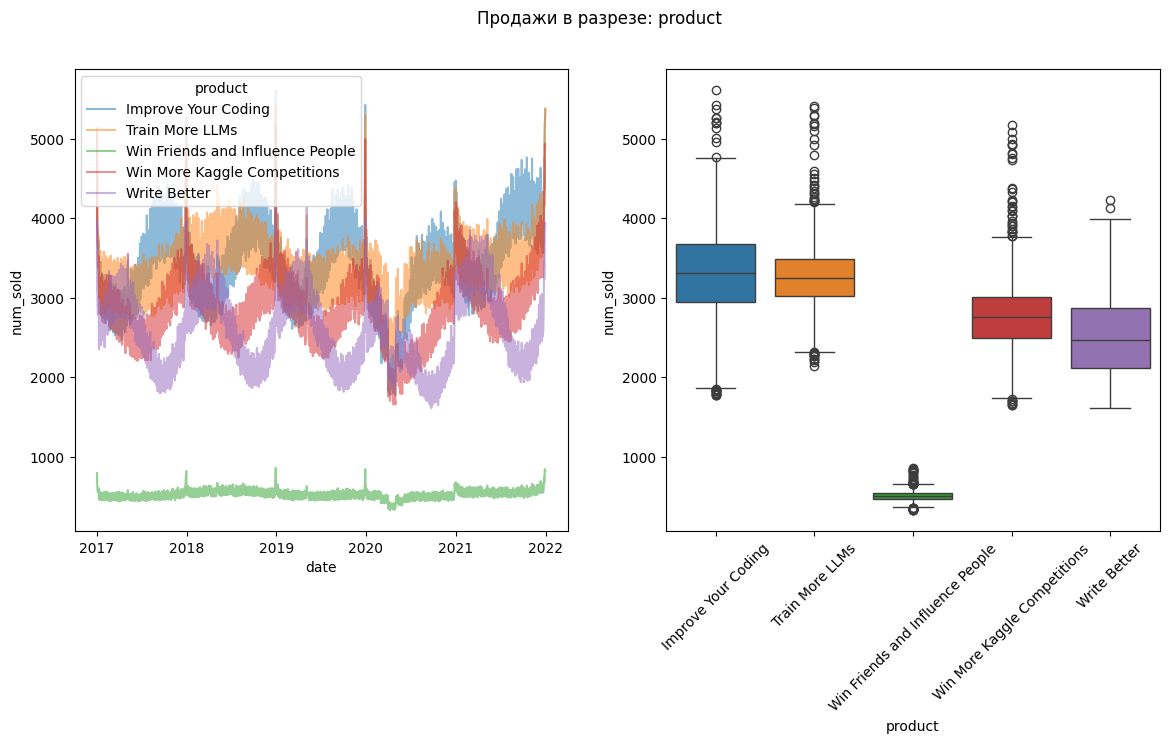

In [10]:
agg_plot(df, 'product')

# Выводы

Поскольку в конце 2019 года начались ограничения, связанные с COVID, попробуем исключить данные с 01.11.2019 по 31.12.2020

In [13]:
df_clean = df.query("date < '2019-11-01' or date > '2021.01.01'").copy()
print(df_clean.shape)
df_clean.head()

(104850, 5)


date    country         store                           product  \
id                                                                         
0  2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1  2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2  2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3  2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4  2017-01-01  Argentina  Kaggle Learn                      Write Better   

    num_sold  
id            
0         63  
1         66  
2          9  
3         59  
4         49

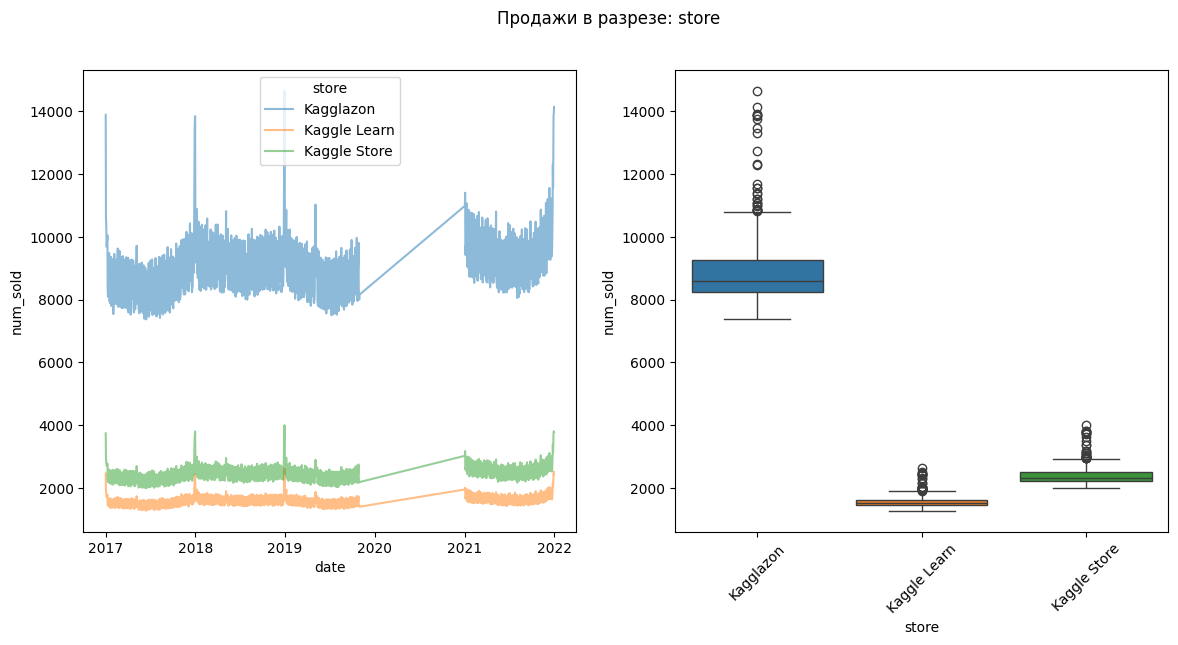

In [14]:
agg_plot(df_clean, 'store')

In [20]:
filename = 'train_cleaned'
df_clean.to_csv(f'../data/interim/{filename}.zip', compression=dict(method='zip', archive_name=f'{filename}.csv'))